In [108]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt

In [109]:
def neighbours(N, L):
    """
    Constrói a matriz de vizinhança.
    Assume que há uma "vizinhança circular" como se a rede 
    fosse um toro.
    Adaptação do algoritmo proposto no enunciado
    """
    # Cria uma matriz Nx4
    viz = np.zeros((N,4), dtype=np.longlong)

    # (k,0): vizinho à direita
    # (k,1): vizinho acima
    # (k,2): vizinho à esquerda
    # (k,3): vizinho abaixo]
    for k in range(N):
        # Vizinho à direita (k,0)
        viz[k][0] = k+1
        if (k % L == L-1):
            # Sítio na borda da direita
            viz[k][0] = k+1-L

        # Vizinho acima (k,1)
        viz[k][1] = k+L
        if (k >= N-L):
            # Sítio na borda superior
            viz[k][1] = k+L-N

        # Vizinho à esquerda (k,2)
        viz[k][2] = k-1
        if (k % L == 0):
            # Sítio na borda da esquerda
            viz[k][2] = k+L-1

        # Vizinho abaixo (k,3)
        viz[k][3] = k-L
        if (k < L):
            # Sítio na borda inferior
            viz[k][3] = k+N-L
    return viz

In [110]:
def energy_ising(s, viz):
    """
    Calcula a energia da rede Ising usando os vizinhos de cada sítio.
    É importante notar que precisamos apenas dos 
    vizinhos à direita e acima
    """
    E = 0
    N = len(s)
    for i in range(N):
        right = viz[i][0]
        up = viz[i][1]
        h = s[right] + s[up]
        E = E - s[i]*h
    return E

In [111]:
rng = np.random.default_rng()
print(rng.random())
print(rng.random())
print(rng.random())
print(rng.random())
print(rng.random())
print(rng.random())
print(rng.random())

0.07028957431399396
0.5400483539214558
0.6352257348780312
0.7171816106728911
0.552657385311307
0.7019439186209295
0.9533926736447927


In [112]:
@jit(nopython=True)
def monte_carlo_pi(nsamples):
    acc = 0
    for i in range(nsamples):
        x = random.random()
        y = random.random()
        if (x ** 2 + y ** 2) < 1.0:
            acc += 1
    return 4.0 * acc / nsamples

In [103]:
monte_carlo_pi(10000000)

3.1412272

In [104]:


lnG

NameError: name 'lnG' is not defined

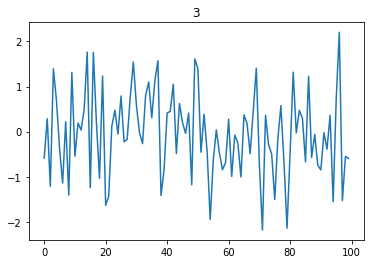

In [105]:
%matplotlib inline
import numpy as np
import pandas as pd
import time
import pandas as pd
import numpy as np
import time
from IPython import display

i = pd.date_range('2013-1-1',periods=100,freq='s')

x = []
y = []
for i in range(50):
    try:
        x = np.append(x, i)
        y = np.append(y, i**2)
        plt.gca().cla() 
    #     plt.plot(x,y,label='test')
        plt.plot(pd.Series(data=np.random.randn(100)))
        plt.title(f"{i}")
        display.display(plt.gcf()) 
        display.clear_output(wait=True)
        time.sleep(0.5) 
    except KeyboardInterrupt:
        break

In [38]:
for t in range(100):
    if t % refresh_rate == 0:
        plt.clf()
        plt.plot(history['val_loss'], 'r-', lw=2, label='val')
        plt.plot(history['training_loss'], 'b-', lw=1, label='training')
        plt.legend()
        display.clear_output(wait=True)
        display.display(plt.gcf())

NameError: name 'refresh_rate' is not defined

In [113]:
def sub_min(H):
    """
    Retorna o mínimo do vetor H, ignorando o segundo e penúltimo
    """
    H0 = np.array([H[0]])
    H2_N2 = np.array(H[2:-2])
    HN = np.array([H[-1]])
#     print(f"H0={H0}, H2_N2={H2_N2}, HN={HN}")
    
    H_wo = np.concatenate((H0,H2_N2,HN))
#     print(f"LesMin={H_wo}")
    return min(H_wo)

In [114]:
sub_min([1,0,3,4,5,6,7,8,0,1])

1

In [115]:
def energy_scale(N,E):
    """
    Escala os valores de energia para que fiquem entre 0 e N 
    ao invés de -2N até 2N
    """
    E = E+2*N
    E = E/4
    if (int(E) - E > 0):
        raise("Energia não inteira pós escala!")
    return int(E)

In [116]:
def random_energy_state(N):
    """
    Gera um estado aleatório de energia
    """
    s = []
    # De 0 a N-1
    rng = np.random.default_rng()
    for i in range(N):
        s.append(np.sign(2*rng.random()-1))
    s = np.array(s)
    return s

In [117]:
random_energy_state(16)

array([ 1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1.,
        1.,  1.,  1.])

In [151]:
from IPython import display

def wang_landau(N, E, s):
    """
    Algoritmo de Wang-Landau para estimativa da densidade de estados g(E)
    """
    # Inicialização arrays, de 0 a N, inclusive
    lnG = np.zeros(N+1, dtype=np.float64)
    H = np.zeros(N+1, dtype=np.int64)
    Hc = np.zeros(N+1, dtype=np.int64)
    mmicro = np.zeros(N+1, dtype=np.float64)
    
    # Variáveis do Loop Principal
    lnf = 1.0
    flat = False
    m = s.sum()
    for i in range(10**7):
        for j in range(N):
            # Escolhe um sítio aleatório
            rng = np.random.default_rng()
            k = rng.integers(N)
            
            # Soma sobre os vizinhos de k
            h = 0
            for v_idx in viz[k]:
                h += s[v_idx]
            
            # Energia desse novo estado
            E2 = E + s[k]*h/2
            if (int(E2) - E2 > 0): print("Energia não inteira pós iteração!")
            E2 = int(E2)
            
#             print(E2)
#             print(E)
#             print(f"k={k}, P={P}")
            
            # Economizar algumas exponenciais
            if lnG[E] > lnG[E2]:
                # Faz a troca
                s[k] = -s[k]
                E = E2
                m = m - 2*s[k]
            else:
                rng = np.random.default_rng()
                P = np.exp(lnG[E] - lnG[E2])
                if (rng.random() < P):
                    # Faz a troca
                    s[k] = -s[k]
                    E = E2
                    m = m - 2*s[k]
            H[E] = H[E] + 1
            lnG[E] = lnG[E] + lnf
            ## Usando o abs no mmicro (?)
            mmicro[E] = mmicro[E] + m
#             print(f"H={H}, Hc={Hc}")
            
        if (i % 1000 == 0):
            hmed = sum(H)/(N-1)
            hmin = sub_min(H)
            
            print(f"H={H}, Hc={Hc}, lnf={lnf}")
            print(f"hmed={hmed}, hmin={hmin}, flat_condition:{hmin}>{0.8*hmed}, i={i}")
            
            
    
            # Plot do histograma!
            plt.gca().cla() 
            plt.plot(H)
            plt.ylim([0,10**4])
            display.display(plt.gcf()) 
            display.clear_output(wait=True)
            
            if (hmin > 0.8*hmed):
                Hc = H.copy()
#                 print(f"H={H}, Hc={Hc}")
#                 print(Hc)
                H = np.zeros(N+1, dtype=np.int64)
                lnf = lnf/2
#                 print(lnf)
        if (lnf < 10**-8):
            break
    mmicro = mmicro/Hc
    lnG0 = lnG[0]
    lnG = lnG - lnG0 + np.log(2)
    return lnG, mmicro

In [152]:
N = 36
s = random_energy_state(N)

viz = neighbours(N,np.sqrt(N))
E = energy_ising(s,viz)
E = energy_scale(N,E)
E

18

<ipython-input-151-be03b67befbc>:88: RuntimeWarning: invalid value encountered in true_divide
  mmicro = mmicro/Hc


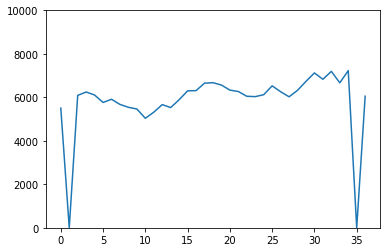

In [153]:
lnG, mmicro = wang_landau(N, E, s)

In [154]:
lnG

array([ 6.93147181e-01, -2.06436506e+03,  4.29234998e+00,  4.99590564e+00,
        7.40650402e+00,  8.73513119e+00,  1.04750838e+01,  1.19806059e+01,
        1.35961331e+01,  1.51611500e+01,  1.66489506e+01,  1.80612004e+01,
        1.93397559e+01,  2.04913247e+01,  2.14624490e+01,  2.22152749e+01,
        2.27820215e+01,  2.31218237e+01,  2.32448769e+01,  2.31199802e+01,
        2.27817873e+01,  2.22219976e+01,  2.14530962e+01,  2.04705636e+01,
        1.93243063e+01,  1.80249955e+01,  1.66489539e+01,  1.51396740e+01,
        1.35615793e+01,  1.19260649e+01,  1.04130156e+01,  8.65235905e+00,
        7.36456063e+00,  4.97756673e+00,  4.26430030e+00, -2.06436506e+03,
        7.14263705e-01])

In [155]:
np.exp(lnG)

array([2.00000000e+00, 0.00000000e+00, 7.31381397e+01, 1.47806744e+02,
       1.64665958e+03, 6.21754981e+03, 3.54218389e+04, 1.59628722e+05,
       8.03018576e+05, 3.84064153e+06, 1.70038546e+07, 6.98038967e+07,
       2.50697066e+08, 7.92992805e+08, 2.09422420e+09, 4.44601881e+09,
       7.83621255e+09, 1.10072910e+10, 1.24486356e+10, 1.09870175e+10,
       7.83437786e+09, 4.47600904e+09, 2.07472871e+09, 7.76699099e+08,
       2.46853678e+08, 6.73218535e+07, 1.70039096e+07, 3.75903930e+06,
       7.75745092e+05, 1.51155583e+05, 3.32901084e+04, 5.72363317e+03,
       1.57902150e+03, 1.45120834e+02, 7.11151433e+01, 0.00000000e+00,
       2.04268211e+00])

In [57]:
mmicro

array([    -inf,      nan,     -inf,     -inf,     -inf,     -inf,
           -inf,     -inf,     -inf,     -inf,     -inf,     -inf,
           -inf,     -inf,     -inf,     -inf,     -inf,     -inf,
           -inf,     -inf,     -inf,     -inf,     -inf,     -inf,
           -inf,     -inf,     -inf,     -inf,     -inf,     -inf,
           -inf,     -inf,     -inf,     -inf,     -inf,      nan,
       -1960.94])

In [58]:
def media_termo(lnG, N, beta):
    """
    Obtém as propriedades termodinâmicas a uma dada temperatura (com inverso beta),
    dada o logaritmo de energias por configuração (lnG)
    """
    Z = 0
    Em = 0
    Em2 = 0
    
    Emin = energy_scale(N,-2*N)
    Emax = energy_scale(N,2*N)
    
    for E in range(N):
        E1 = E - Emin
        Z = Z + np.exp(lnG[E])*np.exp(-beta*E1)
        
        Em = Em + E1*np.exp(lnG[E])*np.exp(-beta*E1)
        Em2 = Em2 + E1*E1*np.exp(lnG[E])*np.exp(-beta*E1)
    Em = Em/Z
    Em2 = Em2/Z
    
    Z = Z*np.exp(-beta*Emin)
    cv = (beta*beta*(Em2-Em**2))/N
    EpS = (Em + Emin)/N
    return Z, EpS, cv

In [59]:
def energia_livre_spin(Z, N, beta):
    """
    Calcula a energia livre por spin, usando a fórmula do enunciado.
    Note que a função np.log é o logaritmo natural.
    """
    result = N * beta
    result = -1/result
    result = result * np.log(Z)  # np.log é o logaritmo natural
    return result

In [60]:
def entropia_spin(e_spin, e_livre_spin, temp):
    """
    Calcula a entropia livre por spin, usando a fórmula do enunciado.
    Note que utiliza a temperatura e não o inverso dela (beta).
    """
    result = e_spin - e_livre_spin
    result = result / temp
    return result

In [61]:
N = 4
s = []
# De 0 a N-1
for i in range(N):
    s.append(-1)
s = np.array(s)
viz = neighbours(N,np.sqrt(N))
E = energy_ising(s,viz)
E = energy_scale(N,E)
lg2, mmicro2 = wang_landau(N, E, s)

hmed=1.3333333333333333, hmin=4, flat_condition:4>1.0666666666666667
H=[0 0 4 0 0], Hc=[0 0 4 0 0]
0.5
hmed=133.33333333333334, hmin=400, flat_condition:400>106.66666666666669
H=[121   0  22   0 257], Hc=[121   0  22   0 257]
0.25
hmed=133.33333333333334, hmin=400, flat_condition:400>106.66666666666669
H=[257   0  17   0 126], Hc=[257   0  17   0 126]
0.125
hmed=133.33333333333334, hmin=400, flat_condition:400>106.66666666666669
H=[224   0  33   0 143], Hc=[224   0  33   0 143]
0.0625
hmed=133.33333333333334, hmin=400, flat_condition:400>106.66666666666669
H=[280   0  17   0 103], Hc=[280   0  17   0 103]
0.03125
hmed=133.33333333333334, hmin=400, flat_condition:400>106.66666666666669
H=[353   0  12   0  35], Hc=[353   0  12   0  35]
0.015625
hmed=133.33333333333334, hmin=400, flat_condition:400>106.66666666666669
H=[ 63   0  45   0 292], Hc=[ 63   0  45   0 292]
0.0078125
hmed=133.33333333333334, hmin=400, flat_condition:400>106.66666666666669
H=[ 72   0  34   0 294], Hc=[ 72   0  34 

<ipython-input-54-1b4318fcd5e6>:69: RuntimeWarning: invalid value encountered in true_divide
  mmicro = mmicro/Hc


In [40]:
N = 16
s = []
# De 0 a N-1
for i in range(N):
    s.append(-1)
s = np.array(s)
viz = neighbours(N,np.sqrt(N))
E = energy_ising(s,viz)
E = energy_scale(N,E)
lg4, mmicro4 = wang_landau(N, E, s)

hmed=1.0666666666666667, hmin=0, flat_condition:0>0.8533333333333334
hmed=107.73333333333333, hmin=207, flat_condition:207>86.18666666666667
H=[ 72   0  89  90 120 124 134 138 137 134 125 112 101  97  97   0  46], Hc=[ 72   0  89  90 120 124 134 138 137 134 125 112 101  97  97   0  46]
0.5
hmed=106.66666666666667, hmin=1600, flat_condition:1600>85.33333333333334
H=[1600    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0], Hc=[1600    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0]
0.25
hmed=106.66666666666667, hmin=1600, flat_condition:1600>85.33333333333334
H=[1600    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0], Hc=[1600    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0]
0.125
hmed=106.66666666666667, hmin=1600, flat_condition:1600>85.33333333333334
H=[1600    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0], Hc=[1600    0    0   

<ipython-input-29-5ccdfabf160d>:67: RuntimeWarning: divide by zero encountered in true_divide
  mmicro = mmicro/Hc
<ipython-input-29-5ccdfabf160d>:67: RuntimeWarning: invalid value encountered in true_divide
  mmicro = mmicro/Hc


In [41]:
N = 36
s = []
# De 0 a N-1
for i in range(N):
    s.append(-1)
s = np.array(s)
viz = neighbours(N,np.sqrt(N))
E = energy_ising(s,viz)
E = energy_scale(N,E)
lg6, mmicro6 = wang_landau(N, E, s)

hmed=1.0285714285714285, hmin=0, flat_condition:0>0.8228571428571428
hmed=103.88571428571429, hmin=110, flat_condition:110>83.10857142857144
H=[  0   0  51  61  70  81  88  93 122 124 126 132 134 136 140 138 145 146
 152 148 143 146 142 139 128 121  90  84  77  77  76  71  68  63  65   0
  59], Hc=[  0   0  51  61  70  81  88  93 122 124 126 132 134 136 140 138 145 146
 152 148 143 146 142 139 128 121  90  84  77  77  76  71  68  63  65   0
  59]
0.5
hmed=102.85714285714286, hmin=0, flat_condition:0>82.28571428571429
hmed=205.71428571428572, hmin=0, flat_condition:0>164.57142857142858
hmed=308.57142857142856, hmin=1956, flat_condition:1956>246.85714285714286
H=[1956    0   37   11   71   11 6547 2026    3   69   51    0    8   10
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0], Hc=[1956    0   37   11   71   11 6547 2026    3   69   51    0    8   10
    0    0    0    0    0    0    0    0    0    0    0    0    0  

hmed=102.85714285714286, hmin=3600, flat_condition:3600>82.28571428571429
H=[3600    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0], Hc=[3600    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0]
9.5367431640625e-07
hmed=102.85714285714286, hmin=3600, flat_condition:3600>82.28571428571429
H=[3600    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0], Hc=[3600    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0]
4.76837158203125e-07
hmed=102.85714285714286, hmin=3600, flat_co

<ipython-input-29-5ccdfabf160d>:67: RuntimeWarning: divide by zero encountered in true_divide
  mmicro = mmicro/Hc
<ipython-input-29-5ccdfabf160d>:67: RuntimeWarning: invalid value encountered in true_divide
  mmicro = mmicro/Hc


In [43]:
# Geração dos dados
x_4 = []
y1_4 = []
y2_4 = []
y3_4 = []
y4_4 = []

x_16 = []
y1_16 = []
y2_16 = []
y3_16 = []
y4_16 = []

x_36 = []
y1_36 = []
y2_36 = []
y3_36 = []
y4_36 = []


step = 0.01
t_min = 1
t_max = 5

for temp in np.arange(t_min,t_max,step):
    beta = 1/temp
    
    # 2x2
    N = 4
    Z, EpS, cv = media_termo(lg2, N, beta)
    x_4.append(temp)
    y1_4.append(EpS)  # Energia por spin
    y2_4.append(cv)   # Calor específico
    liv_spin = energia_livre_spin(Z, N, beta)
    y3_4.append(liv_spin)   # Energia livre por spin
    y4_4.append(entropia_spin(EpS, liv_spin, temp))  # Entropia por spin

    # 4x4
    N = 16
    Z, EpS, cv = media_termo(lg4, N, beta)
    x_16.append(temp)
    y1_16.append(EpS)  # Energia por spin
    y2_16.append(cv)   # Calor específico
    liv_spin = energia_livre_spin(Z, N, beta)
    y3_16.append(liv_spin)   # Energia livre por spin
    y4_16.append(entropia_spin(EpS, liv_spin, temp))  # Entropia por spin
    
    # 6x6
    N = 36
    Z, EpS, cv = media_termo(lg6, N, beta)
    x_36.append(temp)
    y1_36.append(EpS)  # Energia por spin
    y2_36.append(cv)   # Calor específico
    liv_spin = energia_livre_spin(Z, N, beta)
    y3_36.append(liv_spin)   # Energia livre por spin
    y4_36.append(entropia_spin(EpS, liv_spin, temp))  # Entropia por spin

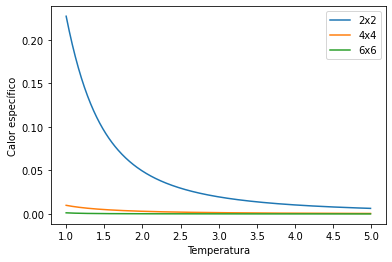

In [44]:
# Plot Calor Específico
plt.plot(x_4 ,y2_4 )
plt.plot(x_16,y2_16)
plt.plot(x_36,y2_36)
plt.ylabel("Calor específico")
plt.xlabel("Temperatura")
plt.legend(["2x2","4x4","6x6"])
plt.show()

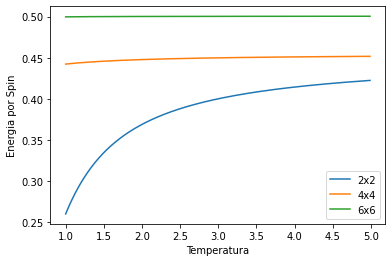

In [45]:
# Plot Energia por Spin
plt.plot(x_4 ,y1_4 )
plt.plot(x_16,y1_16)
plt.plot(x_36,y1_36)
plt.ylabel("Energia por Spin")
plt.xlabel("Temperatura")
plt.legend(["2x2","4x4","6x6"])
plt.show()

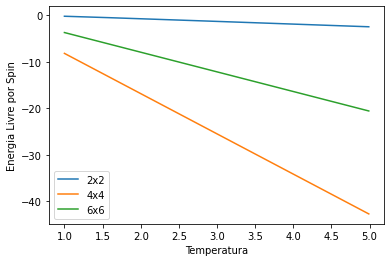

In [46]:
# Plot Energia Livre por Spin
plt.plot(x_4 ,y3_4 )
plt.plot(x_16,y3_16)
plt.plot(x_36,y3_36)
plt.ylabel("Energia Livre por Spin")
plt.xlabel("Temperatura")
plt.legend(["2x2","4x4","6x6"])
plt.show()

## Médias Termdinâmicas Exatas

In [2]:
import pickle

# Carregar do arquivo
# 2x2
L = 2
N = L**2
g2 = None
with open(f"rede{L}x{L}.dict", "rb") as f:
    g2 = pickle.load(f)

# 4x4
L = 4
N = L**2
g4 = None
with open(f"rede{L}x{L}.dict", "rb") as f:
    g4 = pickle.load(f)

# 6x6
L = 6
N = L**2
g6 = None
with open(f"rede{L}x{L}.dict", "rb") as f:
    g6 = pickle.load(f)

In [3]:
print(g2)
print(g4)
print(g6)

{-8: 2, -4: 0, 0: 12, 4: 0, 8: 2}
{-32: 2, -28: 0, -24: 32, -20: 64, -16: 424, -12: 1728, -8: 6688, -4: 13568, 0: 20524, 4: 13568, 8: 6688, 12: 1728, 16: 424, 20: 64, 24: 32, 28: 0, 32: 2}
{-72: 2, -68: 0, -64: 72, -60: 144, -56: 1620, -52: 6048, -48: 35148, -44: 159840, -40: 804078, -36: 3846576, -32: 17569080, -28: 71789328, -24: 260434986, -20: 808871328, -16: 2122173684, -12: 4616013408, -8: 8196905106, -4: 11674988208, 0: 13172279424, 4: 11674988208, 8: 8196905106, 12: 4616013408, 16: 2122173684, 20: 808871328, 24: 260434986, 28: 71789328, 32: 17569080, 36: 3846576, 40: 804078, 44: 159840, 48: 35148, 52: 6048, 56: 1620, 60: 144, 64: 72, 68: 0, 72: 2}


In [ ]:
# Normalize g2 energy
g2_escaled

In [8]:
lg2 = np.log(g2, where=g2>0)
lg2

TypeError: '>' not supported between instances of 'dict' and 'int'